### loading packages numpy and pandas

In [1]:
import numpy as np
import pandas as pd

### Converting Dictionary of Key and Value Pairs to a CSV file with Keys as columns and Values as rows

In [2]:
# Employee table
data = {'Name':['John','Peter','Praveen','Arun'], 'Age':[28,34,49, 40], 'ID_':[101, 102, 103, 104]}
df = pd.DataFrame(data)

In [3]:
df.head()

,Name,Age,ID_
0,John,28,101
1,Peter,34,102
2,Praveen,49,103
3,Arun,40,104


In [4]:
df.head(2)

,Name,Age,ID_
0,John,28,101
1,Peter,34,102


In [5]:
df.tail(2)

,Name,Age,ID_
2,Praveen,49,103
3,Arun,40,104


### df.describe() gives you the summary of your dataset

In [6]:
df.describe()

,Age,ID_
count,4.000000,4.000000
mean,37.750000,102.500000
std,8.958236,1.290994
min,28.000000,101.000000
25%,32.500000,101.750000
50%,37.000000,102.500000
75%,42.250000,103.250000
max,49.000000,104.000000


In [7]:
df.to_csv("check.csv", index=False)

### If you want to load this csv file

In [9]:
df = pd.read_csv("check.csv")
df.head()

,Name,Age,ID_
0,John,28,101
1,Peter,34,102
2,Praveen,49,103
3,Arun,40,104
4,Harika,30,105


In [17]:
for n in range(len(df.index)):
    print(f"Name is : {df['Name'][n]} and age is {df['Age'][n]} and his id is {df['ID_'][n]}")

Name is : John and age is 28 and his id is 101
Name is : Peter and age is 34 and his id is 102
Name is : Praveen and age is 49 and his id is 103
Name is : Arun and age is 40 and his id is 104
Name is : Harika and age is 30 and his id is 105


In [18]:
filter_df = df[df['Age']>30]
filter_df.head()

,Name,Age,ID_
1,Peter,34,102
2,Praveen,49,103
3,Arun,40,104


In [19]:
filter_df = df[(df['Age']>30) & (df['ID_'] > 103)]
filter_df.head()

,Name,Age,ID_
3,Arun,40,104


In [25]:
df.head()

,Name,Age,ID_
0,John,28,101
1,Peter,34,102
2,Praveen,49,103
3,Arun,40,104
4,Harika,30,105


In [24]:
#df.iloc -> dfiloc[start_row:end_row, start_col:end_col] -> if end_row is n then it will fetch the value for n -1
print(df.iloc[2:3, 1:2]) # here n = 2 that means n-1 is 2-1 which is 1 so i am selecting only 1 column

   Age
2   49


In [27]:
y = df['Age'].to_list()
print(y)

[28, 34, 49, 40, 30]


In [35]:
y[len(y)-1]

30

### In pandas you can merge two dataframes

In [36]:
data = {'Name':['John','Peter','Praveen','Arun'], 'Age':[28,34,49, 40], 'ID_':[101, 102, 103, 104]}
df1 = pd.DataFrame(data)

In [37]:
data = {'Name':['John','Peter','Praveen','Arun'], 'Location':['India','USA','France','Finland']}
df2 = pd.DataFrame(data)

In [38]:
df3 = pd.merge(df1, df2, on='Name')
df3.head()

,Name,Age,ID_,Location
0,John,28,101,India
1,Peter,34,102,USA
2,Praveen,49,103,France
3,Arun,40,104,Finland


In [39]:
df3.to_csv("check.csv", index=False)

In [43]:
df3['salary'] = [3000, 5000, None, 6000]

In [44]:
df3.head()

,Name,Age,ID_,Location,salary
0,John,28,101,India,3000.0
1,Peter,34,102,USA,5000.0
2,Praveen,49,103,France,NaN
3,Arun,40,104,Finland,6000.0


In [45]:
filter_df = df3.dropna()

In [46]:
filter_df.head()

,Name,Age,ID_,Location,salary
0,John,28,101,India,3000.0
1,Peter,34,102,USA,5000.0
3,Arun,40,104,Finland,6000.0


In [52]:
filter_df = df3.drop(columns=['Location','ID_'])
filter_df.head()

,Name,Age,salary
0,John,28,3000.0
1,Peter,34,5000.0
2,Praveen,49,NaN
3,Arun,40,6000.0


In [53]:
import matplotlib.pyplot as plt

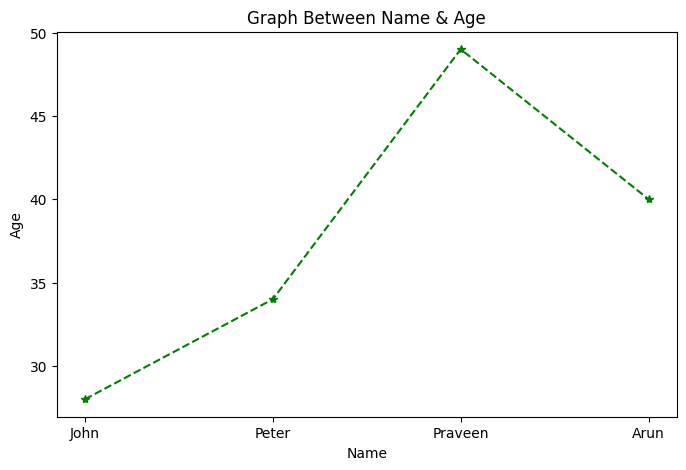

In [64]:
plt.figure(figsize=(8,5))
plt.plot(df3['Name'], df3['Age'], marker='*', linestyle='--', color='g')
plt.title('Graph Between Name & Age')
plt.xlabel('Name')
plt.ylabel('Age')
plt.show()

In [65]:
import seaborn as sns

In [66]:
filter_df.head()

,Name,Age,salary
0,John,28,3000.0
1,Peter,34,5000.0
2,Praveen,49,NaN
3,Arun,40,6000.0


In [67]:
filter_df['salary'][2]=150

C:\Users\prave\AppData\Local\Temp\ipykernel_10684\1454350099.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  filter_df['salary'][2]=150
C:\Users\prave\AppData\Local\Temp\ipykernel_10684\1454350099.py:1: SettingWithCopyWarning: 
A value i

In [68]:
filter_df.head()

,Name,Age,salary
0,John,28,3000.0
1,Peter,34,5000.0
2,Praveen,49,150.0
3,Arun,40,6000.0


In [71]:
correlation = filter_df[['Age','salary']].corr()

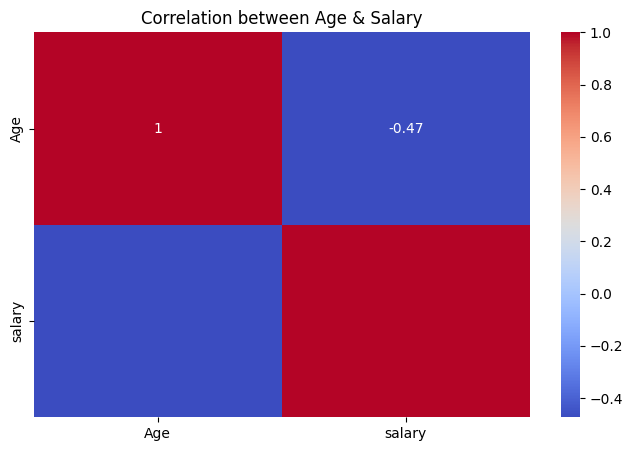

In [72]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Age & Salary')
plt.show()